# <span style="color:orange">Simple Sentiment Analysis</span>

### load Dataset

In [4]:
import pandas as pd

path = r'E:\Codex Cue Deep Learning Internship\Project 2\IMDB Dataset.csv'
df = pd.read_csv(path)
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


###  Clean and preprocess text data

In [5]:
import re
def clean_text(text):
    text = re.sub(r'<br />', ' ', text) 
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = text.lower()
    return text

df['review'] = df['review'].apply(clean_text)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming te...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


###  Tokenization

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])

X_sequences = tokenizer.texts_to_sequences(df['review'])

print(f"Original text:\n{df['review'][0]}\n")
print(f"Tokenized sequence:\n{X_sequences[0]}\n")


Original text:
one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with me  the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word  it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away  i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare f

###  Padding

In [7]:
max_length = 200 
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating='post')
print(f"Padded sequence:\n{X_padded[0]}")

Padded sequence:
[  28    5    2   76 1928   45 1056   12  101  144   40 3246  388  468
   26 3105   34   23  202   14   11    7  599   48  576   15   69    2
   88  146   12 3223   69   42 3246   13   29 5353    3    1  133    5
  574   61  284    8  202   35    2  666  138 1689   69   11    7   21
    4  118   16    2 8123 5599   39    1   11  118 2489   55 5877   15
 5328    6 1438  382   39  574   29    7 3343    8    2  349  346    5
    2  666    9    7  471 3246   14   12    7    2    1  345    6    2
    1 6678 2498 1052    1    9 2621 1367   20    1  528   33 4659 2480
    5    2 1178  114   31    2 6834   25 2907    1    3  398    1   37
    1    7   21  318   20    2 4838 3526  528    7  338    6    1 8171
    1    1 5045 7571 2450    3    1    1  323 9034 7231    1    3 8495
    1   23  109  227  239   10   57  130    2  274 1278    5    2  118
    7  667    6    2  189   12    9  265  114   76  257  551 2961  810
  180 1240 4274   16 2472 1087  810 1387  810    1  148  936

###  Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])


### Splitting the Dataset

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)


### Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Example model
model = Sequential([
    Embedding(input_dim=10000, output_dim=16),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### Training, Evaluation and Prediction

In [11]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

new_text = ["This movie was really bad."]
new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding='post', truncating='post')

prediction = model.predict(new_padded)
predicted_sentiment = 'positive' if prediction > 0.5 else 'negative'
print(f'Predicted sentiment: {predicted_sentiment}')


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 113s 85ms/step - accuracy: 0.5109 - loss: 0.6927 - val_accuracy: 0.6012 - val_loss: 0.6725
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 75s 60ms/step - accuracy: 0.6139 - loss: 0.6554 - val_accuracy: 0.6312 - val_loss: 0.6201
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.6513 - loss: 0.6097 - val_accuracy: 0.6419 - val_loss: 0.6348
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 71s 57ms/step - accuracy: 0.6824 - loss: 0.5734 - val_accuracy: 0.8462 - val_loss: 0.3633
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.8817 - loss: 0.2948 - val_accuracy: 0.8725 - val_loss: 0.3050
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 57ms/step - accuracy: 0.9081 - loss: 0.2374 - val_accuracy: 0.8686 - val_loss: 0.3160
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 52ms/step - accuracy: 0.9257 - loss: 0.1982 - val_accuracy: 0.8777 - val_loss: 0.3001
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9434 

### Confusion Matrics

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


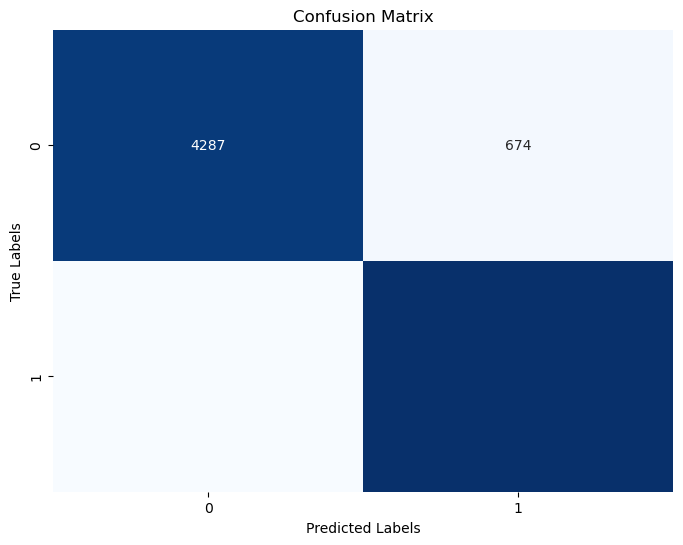

In [17]:
import matplotlib.pyplot as plt

y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


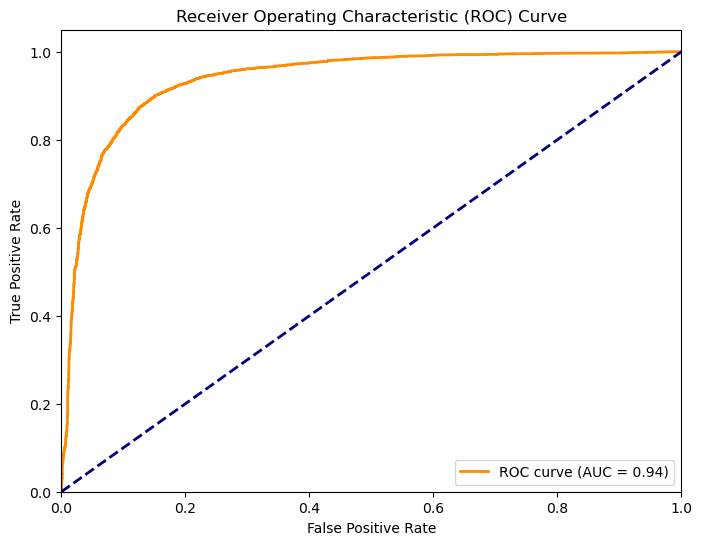

In [18]:
from sklearn.metrics import roc_curve, auc


y_probs = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Precisions Recall Curves

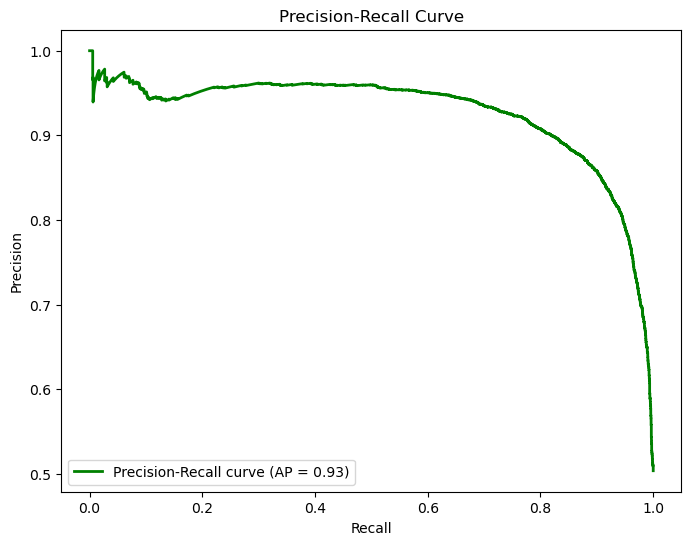

In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score


precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


### Class Distribution

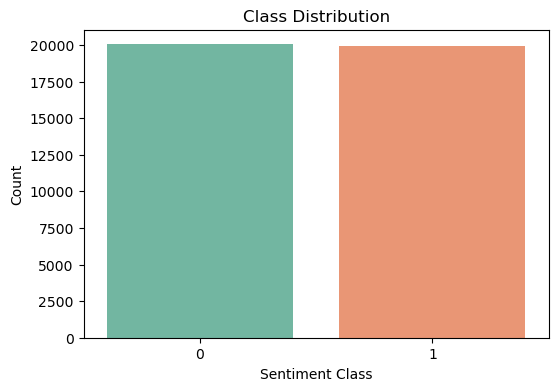

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.show()


### Word Clouds

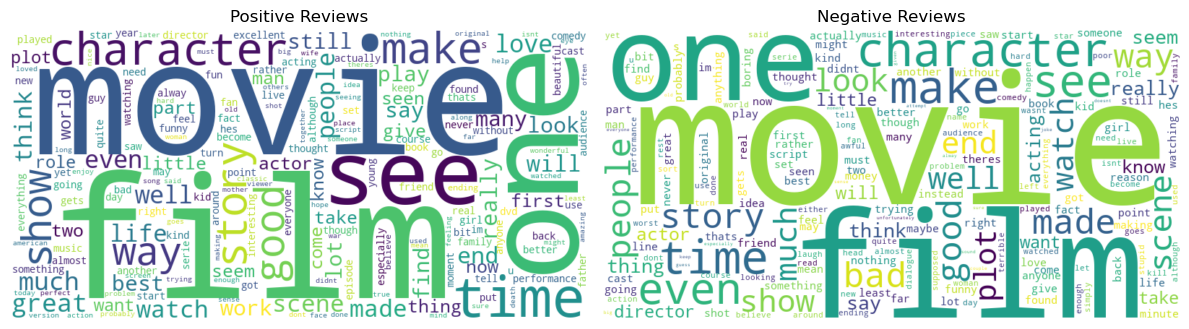

In [21]:
from wordcloud import WordCloud


positive_words = ' '.join(df[df['sentiment'] == 'positive']['review'])
negative_words = ' '.join(df[df['sentiment'] == 'negative']['review'])


plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_words)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.tight_layout()
plt.show()
